### Scipy를 이용한 검정

#### 1. 이항검정 : 이항분포를 이용하여 베르누이 확률변수의 모수 𝜇에 대한 가설을 조사하는 검정 방법이다. 사이파이 stats 서브 패키지의 binom_test 명령은 이항검정의 유의확률을 계산한다. 디폴트 귀무가설은 𝜇 = 0.5이다.

scipy.stats.binom_test(x, n=None, alternative='two-sided')
- x: 검정통계량, 1이 나온 횟수
- n: 총 시도 횟수
- p: 귀무가설의 𝜇값
- alternative: 양측검정인 경우에는 'two-sided', 단측검정인 경우에는 'less', 'greater'

##### 예제
실제모수 𝜇0=0.5인 베르누이 확률변수의 시뮬레이션을 통해 이항검정을 실습해보자. 데이터의 개수 N=10일 때, 1이 나온 횟수가 7이다.

In [5]:
import numpy as np
import scipy as sp

N = 10
mu_0 = 0.5
np.random.seed(0)

x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

7

모수가 0.5인 베르누이 분포라면 가장 가능성이 높은 5가 나와야 하는데 여기에선 7이 나왔다. 그렇다면 이 확률변수의 모수는 0.5가 아니라 0.7일까? 모수가 0.5라는 귀무가설의 신빙성을 확인하기 위해 binom_test 이항검정 명령으로 유의확률을 구하면 약 34%이다.

In [6]:
sp.stats.binom_test(n,N)

0.34375

유의확률이 높으므로 모수가 0.5라는 귀무가설을 기각할 수 없다.

이항검정은 두 가지 값을 가지는 확률변수의 분포를 판단하는데 도움을 준다. 예를 들어 위에서 사용한 데이터가 사실은 어떤 자격시험 합격자 10명중 7명이 대학졸업자라는 것을 뜻하는 데이터였다고 하자. 그렇다면 이 데이터로부터 '대학졸업자가 비졸업자보다 실력이 좋다'고 주장할 수 있는가?

합격자의 대학 졸업 유무가 베르누이 확률분포로 결정되는 값이라고 가정하자. 만약 베르누이 확률분포의 모수가 0.5이면 대학 졸업자와 비졸업자의 실력은 같은 것이다. 위의 검정 결과에서 보듯이 대학졸업자와 비졸업자 동등한 실력을 가진 경우에도 7명 혹은 그보다 더 많은 대학졸업자가 합격할 확률인 유의확률은 34%나 된다. 따라서 '대학졸업자가 비졸업자보다 실력이 좋다'는 주장은 유의하지 않다.

##### 예제
𝜇=0.5라고 생각되는 확률변수에서 데이터 개수 N = 100번 시뮬레이션하여 1이 49번 나온 경우에 대해 이항검정을 실시해보자.

In [7]:
N = 100
mu_0 = 0.5
np.random.seed(0)

x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

49

In [8]:
sp.stats.binom_test(n,N)

0.9204107626128212

유의확률이 92%로 높으므로 귀무가설을 기각할 수 없다. 따라서 𝜇=0.5다.

##### 예제
이번에는 실제 모수 𝜇0=0.35인 경우에 대해 시뮬레이션을 했더니 1이 100번 중 31번 나왔다.

In [9]:
N = 100
mu_0 = 0.35
np.random.seed(0)

x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

31

이 결과를 귀무가설 𝐻0:𝜇=0.5로 이항검정 명령을 실시하면 유의확률은 0.0018%이다.

In [10]:
sp.stats.binom_test(n, N)

0.00018314322488235366

유의 확률이 0.05보다 작기 때문에 귀무가설을 기각할 수 있다. 따라서 𝜇≠0.5다. 이는 우리가 시뮬레이션 한 진실과 일치한다. 

#### 2. 카이제곱검정
앞에서 베르누이분포의 모수에 대해 검정을 하려면 베르누이분포 표본의 합이라는 통계량이 이항분포를 따른다는 성질을 이용하면 된다고 배웠다. 그러면 카테고리분포의 모수에 대해 검정을 하려면 카테고리 분포 표본의 합이라는 통계량이 다항분포를 따른다는 성질을 이용할 수 있을까?

결론을 말하자면 통계량으로 카테고리분포 표본의 합은 이용할 수 없다. 왜냐하면 이 통계량은 스칼라가 아닌 벡터 값을 가지기 때문이다. 이때는 카이제곱검정이라는 방법을 사용한다. 

카이제곱검정은 범주형 확률분포의 모수 𝜇=(𝜇1,…,𝜇𝐾)에 대한 가설을 조사하는 검정방법으로 적합도 검정(goodness of fit test)이라고도 부른다. 원래 범주형 값 k가 나와야할 횟수의 기댓값 𝑚𝑘 와 실제 나온 횟수 𝑥𝑘의 차이를 이용하여 다음처럼 검정 통계량을 구한다. 

∑𝑘=1𝐾(𝑥𝑘−𝑚𝑘)**2 / 𝑚𝑘

Scipy stats 서브패키지의 chisquare 명령은 카이제곱검정의 검정통계량과 유의확률을 계산한다. f_exp이 주어지지 않는 경우의 디폴트 귀무가설은 𝜇=(1/𝐾,…,1/𝐾)이다. 

scipy.stats.chisquare(f_obs, f_exp=None)
- f_obs : 데이터 행렬
- f_exp : 기댓값 행렬




##### 예제
데이터 개수 N = 10, 귀무가설 모수 𝜇0=(0.25,0.25,0.25,0.25), 실제 데이터 (0,3,5,2)인 경우에 대해 카이제곱 검정 명령을 실시해보자.


In [11]:
N = 10
K = 4
mu_0 = np.ones(K) / K
np.random.seed(0)

x = np.random.choice(K, N, p=mu_0)
n = np.bincount(x, minlength=K)
n

array([0, 3, 5, 2])

In [13]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=5.199999999999999, pvalue=0.157724450396663)

유의확률이 15.8%로 높으므로 귀무가설을 기각할 수 없다. 따라서 𝜇0=(0.25,0.25,0.25,0.25)다.

##### 예제
이번에는 데이터 개수 N = 100, 귀무가설 모수 𝜇0=(0.35, 0.3, 0.20, 0.15), 실제 데이터 (37, 32, 20, 11)인 경우에 대해 카이제곱 검정 명령을 실시해보자.

In [14]:
N = 100
K = 4
mu_0 = np.array([0.35, 0.3, 0.20, 0.15])
np.random.seed(0)

x = np.random.choice(K, N, p=mu_0)
n = np.bincount(x, minlength=K)
n

array([37, 32, 20, 11])

In [15]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=16.56, pvalue=0.0008703471978912127)

유의확률이 0.087이므로 귀무가설을 기각할 수 있다. 따라서 𝜇≠(0.25,0.25,0.25,0.25)다.

#### 3. 카이제곱 독립검정
카이제곱검정은 어떤 범주형 확률변수 X가 다른 범주형 확률변수 Y와 독립인지 상관관계를 가지는가를 검증하는데도 사용할 수 있다. 카이제곱검정을 독립을 확인하는데 사용하면 카이제곱 독립검정이라고 부른다. 

확률변수 X와 Y가 독립이라면 결합확률질량함수 P(x,y)는 각 확률변수 X와 Y의 주변 확률밀도 함수 P(x), P(y)의 곱이다. 예를 들어 다음과 같은 확률분포를 가진다면 X와 Y는 독립이다.

             P(Y=0)=0.3	P(Y=1)=0.7
P(X=0)=0.4	    0.12	0.28
P(X=1)=0.6	    0.18	0.42

이러한 확률변수의 표본을 측정하여 그 횟수를 표로 나타낸 것을 분할표(contingency table)라고 한다. 예를 들어 50개의 표본을 측정한 분할표가 다음과 같다면 확률변수 X와 Y가 독립이라고 주장할 수 있을 것이다. 

	Y=0	Y=1
X=0	6	14
X=1	9	21

그런데 만약 분할표가 다음과 같다면 독립일까 독립이 아닐까? 원래 독립인데 표본오차에 의해 약간의 차이가 생긴 것인지 아니면 독립이 아니라서 저런 결과가 나온 것일까?

	Y=0	Y=1
X=0	5	15
X=1	10	20

이 문제는 카이제곱검정을 사용하여 풀 수 있다. 만약 두 확률변수가 독립이라면 X = 0일 때의 Y분포와 X = 1일 때의 Y분포가 같아야 한다. 따라서 두 경우의 표본 집합이 같은 확률분포에서 나왔다는 것을 귀무가설로 하는 카이제곱 검정을 하여 채택된다면 두 확률변수는 독립이다. 만약 기각된다면 두 확률변수는 상관관계가 있다. 

Scipy의 chi2_contingency() 명령은 이러한 검정을 수행한다. X의 값에 따른 각각의 Y분포가 2차원 표(contingency table)의 형태로 주어지면 독립인 경우의 분포와 실제 y표본 분포의 차이를 검정 통계량으로 계산한다. 이 값이 충분히 크다면 X와 Y는 상관관계가 있다. chi2_contingency()명령의 결과는 튜플로 반환되며 첫 번째 값이 검정통계량, 두 번째 값이 유의확률이다.

In [16]:
obs = np.array([[5,15], [10,20]])
sp.stats.chi2_contingency(obs)

(0.0992063492063492,
 0.7527841326498471,
 1,
 array([[ 6., 14.],
        [ 9., 21.]]))

이 때 카이제곱 독립검정의 유의확률은 75%이다. 즉 X와 Y는 상관관계가 있다고 말할 수 없다.

#### 4. 단일표본 z검정
분산 𝜎2의 값을 정확히 알고 있는 정규분포의 표본에 대해 기댓값을 조사하는 검정방법이다. 단일 표본 z검정의 경우에는 많이 사용되지 않고 Scipy 별도의 함수가 준비되어 있지 않으므로 norm 명령의 cdf 메서드를 사용하여 직접 구현해야 한다.


##### 예제
실제모수 =0 , 𝜎2=1인 경우에 대해 표본 데이터 N = 10개를 시뮬레이션으로 구하여 귀무가설 𝜇0 = 0에 대한 단일표본 z검정 명령을 실시해보자.

In [17]:
N = 10
mu_0 = 0

np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

단일표본 z검정 함수를 다음처럼 구현할 수 있다. 이 함수는 검정통계량과 유의확률을 튜플형태로 반환한다.

In [18]:
def ztest_1samp(x, sigma2=1, mu=0):
    z = (x.mean() - mu) / np.sqrt(sigma2/len(x))
    return z, 2 * sp.stats.norm().sf(np.abs(z))

ztest_1samp(x)

(2.3338341854824276, 0.019604406021683538)

만약 유의수준이 5%이면 유의확률이 1.96이므로 귀무가설을 기각할 수 있다. 따라서 𝜇≠0 이다. 이 경우는 검정 결과가 오류인 예시이다. 검정결과가 오류로 나온 이유는 데이터 수가 10개로 부족하기 때문이다. 이러한 오류는 귀무가설이 진실임에도 불구하고 기각된 경우로 1종 오류라고 한다. 1종 오류가 나오려면 귀무가설이 진실이지만 유의확률은 유의수준보다 작아야한다. 1종 오류가 나올 확률은 유의수준과 같다.

데이터 개수 N = 100, 실제 모수 𝜇0=0에 대해 단일표본 z검정 명령을 실시해보자.

In [19]:
N = 100
mu_0 = 0
np.random.seed(0)

x = sp.stats.norm(mu_0).rvs(N)
ztest_1samp(x)

(0.5980801553448499, 0.5497864508624168)

In [20]:
N = 100
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
ztest_1samp(x)

(0.5980801553448499, 0.5497864508624168)

유의확률이 54.98%이므로 귀무가설을 기각할 수 없다. 따라서 𝜇=0 이다.

#### 5. 단일표본 t-검정
단일 표본 t검정은 정규분포의 표본에 대해 기댓값을 조사하는 검정방법이다. 검정통계량으로 스튜던트 t분포를 가진 t통계량을 사용한다.

𝑥¯−𝜇0/(𝑠/𝑁)

이 식에서 𝑥¯ 는 표본평균, 𝑠는 표본표준편차다.

Scipy stats 서브 패키지의 ttest_1samp 명령을 사용한다. ttest_1samp 명령의 경우에는 디폴트 모수가 없으므로 기댓값을 나타내는 popmean 인수를 직접 지정해야 한다.

scipy.stats.ttest_1samp(a, popmean)
- a : 표본 데이터 배열
- popmean : 귀무가설의 기댓값

데이터 개수 N = 10, 실제 모수 𝜇0=0 인 경우에 대해 단일 표본 t검정 명령을 실시해보자.

In [21]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sp.stats.ttest_1samp(x, popmean=0)

Ttest_1sampResult(statistic=2.28943967238967, pvalue=0.04781846490857058)

유의수준이 4.78%이므로 만약 유의 수준이 5% 이상이라면 귀무가설을 기각할 수 있다. 따라서 𝜇≠0 이다. 이 경우도 유형 1 오류의 예라고 볼 수 있다. 실제 모수 𝜇0가 0인데도 시뮬레이션 결과에 대한 검정 결과가 오류로 나온 이유는 데이터의 수가 10개로 부족하기 때문이다.

이번에는 데이터의 개수 N이 100인 경우에 대해 단일표본 t검정 명령을 실시해보자.

In [22]:
N = 100
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sp.stats.ttest_1samp(x, popmean=0)

Ttest_1sampResult(statistic=0.5904283402851698, pvalue=0.5562489158694675)

p-value가 0.05보다 크기 때문에 귀무가설을 채택한다.

#### 6.독립표본 t검정
독립표본 t검정은 두 개의 독립적인 정규분포에서 나온 N1, N2 개의 데이터 셋을 사용하여 두 정규분포의 기댓값이 동일한지를 검사한다.

독립표본 t검정은 Scipy stats 서브패키지의 ttest_ind 명령을 사용하여 계산한다. 독립표본 t검정은 두 정규분포의 분산값이 같은 경우와 같지 않은 경우에 사용하는 검정통계량이 다르기 때문에 equal_var 인수를 사용하여 이를 지정해 주어야 한다. 두 분포의 분산이 같은지 다른지는 다음에 나올 등분산 검정을 사용하면 된다. 만약 잘 모르겠으면 equal_var = False로 놓으면 된다.

scipy.stats.ttest_inds(a, b, equal_var=True)
- a : 1번 표본 집합 데이터
- b : 2번 표본 집합 데이터
- equal_var : 두 표본 집합의 분산이 같은 경우에는 True


##### 예제
두 정규분포의 기댓값이  𝜇1=0, 𝜇2=0.5로 다르고 분산은 𝜎1=𝜎2=1으로 같으며 표본의 수가 N1 = N2 = 10인 경우를 시뮬레이션해보자. 우리는 분산값이 정말 같은 지 모르므로 일단 equal_var = False로 놓는다.

/var/folders/7n/pm50m3212tq_hg29f8q2fdh00000gn/T/ipykernel_967/1378065626.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x1, kde=False, fit = sp.stats.norm, label='1번 데이터 셋')
/var/folders/7n/pm50m3212tq_hg29f8q2fdh00000gn/T/ipykernel_967/1378065626.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

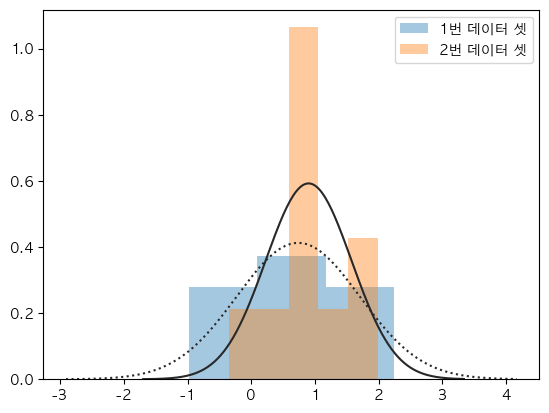

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

rc('font', family='AppleGothic')


N_1 = 10
mu_1 = 0
sigma_1 = 1

N_2 = 10
mu_2 = 0.5
sigma_2 = 1
np.random.seed(0)

x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)

ax = sns.distplot(x1, kde=False, fit = sp.stats.norm, label='1번 데이터 셋')
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label='2번 데이터 셋')
ax.lines[0].set_linestyle(':')

plt.rcParams['axes.unicode_minus'] = False
plt.legend()
plt.show()

In [28]:
np.mean(x1), np.mean(x2)

(0.7380231707288347, 0.9006460151624349)

두 표본집합의 표본 평균은 각각 0.74, 0.9로 다르다.

In [29]:
sp.stats.ttest_ind(x1, x2, equal_var=False)

Ttest_indResult(statistic=-0.4139968526988655, pvalue=0.6843504889824326)

t검정의 결과는 유의확률 68%이므로 두 기댓값이 같다는 귀무가설을 기각할 수 없다. 따라서 𝜇1=𝜇2 이다. 

시뮬레이션에 사용한 두 정규분포의 모수가 원래는 다르기 때문에 이 경우는 검정 결과가 오류인 또 다른 예시이다. 이러한 오류는 귀무가설이 거짓임에도 불구하고 진실로 나온 경우로 2종 오류라고 한다. 데이터 수가 증가하면 이러한 오류가 발생할 가능성이 줄어든다.


##### 예시
데이터의 개수를 50개와 100개로 증가시킨 경우에 유의확률은 0.8로 감소했다. 따라서 두 확률분포의 기댓값이 일치한다는 귀무가설은 기각할 수있고 2종 오류는 발생하지 않는다.

In [30]:
N_1 = 50
mu_1 = 0
sigma_1 = 1

N_2 = 100
mu_2 = 0.5
sigma_2 = 1

np.random.seed(0)

x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
sp.stats.ttest_ind(x1, x2, equal_var=True)

Ttest_indResult(statistic=-2.6826951236616963, pvalue=0.008133970915722658)

#### 7. 대응표본 t검정
대응표본 t검정은 독립표본 t검정을 두 집단의 표본이 1대1 대응하는 경우에 대해 수정한 것이다. 즉, 독립표본 t검정과 마찬가지로 두 정규분포의 기댓값이 같은지 확인하기 위한 검정이다. 통계량은 대응하는 표본 값의 차이 𝑥𝑑=𝑥𝑖,𝑖−𝑥𝑖,2 에서 다음처럼 계산한다.

대응표본 t검정은 ttest_rel 명령을 사용한다

ttest_rel(a,b)
- a: 1번 표본 집합 데이터
- b: 2번 표본 집합 데이터

##### 예제
𝜇1 = 0→0.4로 평균이 달라진 경우에 대해 대응표본 t검정을 실시해보자. 데이터의 개수 N은 5다. 

/var/folders/7n/pm50m3212tq_hg29f8q2fdh00000gn/T/ipykernel_967/3297435878.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label = '1번 데이터 셋')
/var/folders/7n/pm50m3212tq_hg29f8q2fdh00000gn/T/ipykernel_967/3297435878.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


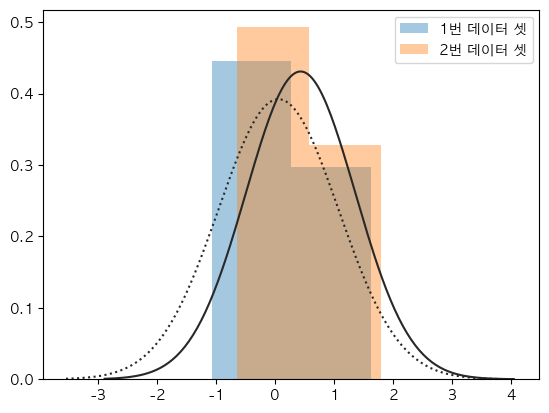

In [33]:
N = 5
mu_1 = 0
mu_2 = 0.4

np.random.seed(1)
x1 = sp.stats.norm(mu_1).rvs(N)
x2 = x1 + sp.stats.norm(mu_2, 0.1).rvs(N)

ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label = '1번 데이터 셋')
ax = sns.distplot(x2, kde = False, fit = sp.stats.norm, label='2번 데이터 셋')
ax.lines[0].set_linestyle(":")

plt.legend()
plt.show()

In [34]:
sp.stats.ttest_rel(x1, x2)

Ttest_relResult(statistic=-5.662482449248929, pvalue=0.0047953456833781305)

5개의 데이터만으로도 두 평균이 다르다는 것을 유의확률 0.48%로 알아냈음을 확인할 수 있다.

#### 8. 등분산 검정
ttest_ind 명령을 사용하려면 두 데이터집합의 분산이 같은 지 먼저 알아내야 한다. 등분산 검정은 두 정규분포의 분산 모수가 같은 지 확인하기 위한 검정이다. 바틀렛, 플리그너, 레빈 검정을 주로 사용한다. Scipy 서브패키지는 이를 위한 bartlett, fligner, levene 명령을 제공한다.

##### 예제
실제로 분산이 다른 두 개의 데이터 집합을 만들어보자.

/var/folders/7n/pm50m3212tq_hg29f8q2fdh00000gn/T/ipykernel_967/1475596933.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x1, kde=False, fit = sp.stats.norm, label='1번 데이터 셋')
/var/folders/7n/pm50m3212tq_hg29f8q2fdh00000gn/T/ipykernel_967/1475596933.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

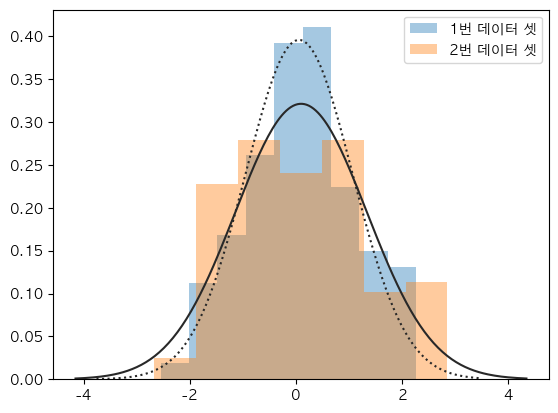

In [36]:
N1 = 100
N2 = 100
sigma_1 = 1
sigma_2 = 1.2

np.random.seed(0)

x1 = sp.stats.norm(0, sigma_1).rvs(N1)
x2 = sp.stats.norm(0, sigma_2).rvs(N2)

ax = sns.distplot(x1, kde=False, fit = sp.stats.norm, label='1번 데이터 셋')
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label='2번 데이터 셋')
ax.lines[0].set_linestyle(':')

plt.legend()
plt.show()

다른 등분산 검정을 적용한 결과는 서로 다를 수 있다. 따라서 검정 결과도 이러한 점을 고려하여 결정한다.

In [37]:
x1.std(), x2.std()

(1.0078822447165796, 1.2416003969261071)

유의수준 1%기준에서 bartlett 명령의 결과는 두 데이터 집합의 분산이 같다고 계산하지만, fligner, levene 명령은 두 데이터 집합의 분산이 다르다고 계산한다.

In [38]:
sp.stats.bartlett(x1, x2)

BartlettResult(statistic=4.253473837232266, pvalue=0.039170128783651344)

In [39]:
sp.stats.fligner(x1, x2)

FlignerResult(statistic=7.224841990409457, pvalue=0.007190150106748367)

In [40]:
sp.stats.levene(x1, x2)

LeveneResult(statistic=7.680708947679437, pvalue=0.0061135154970207925)

#### 9. 정규성 검정
회귀 분석 등에서는 확률분포가 가우시안 정규분포를 따르는지 아닌지를 확인하는 것이 중요하다. 이러한 검정을 정규성 검정이라고 한다. 정규성 분포는 중요한 만큼 다양한 검정 방법들이 개발되어 있으며 Scipy 패키지 이외에 통계분석에 많이 사용되는 StatsModels 패키지도 다양한 정규성 검정 명령어를 제공한다. 

Scipy 제공
- 콜모고로프-스미르노프 검정(Kolmogorov-Smirnov test) : scipy.stats.ks_2samp
- 샤피로-윌크 검정(Shapiro–Wilk test) : scipy.stats.shapiro
- 앤더스-달링 검정(Anderson–Darling test) : scipy.stats.anderson
- 다고스티노 K-제곱 검정(D’Agostino’s K-squared test) : scipy.stats.mstats.normaltest

Statsmodels 제공
- 콜모고로프-스미르노프 검정(Kolmogorov-Smirnov test) : statsmodels.stats.diagnostic.kstest_normal
- 옴니버스 검정(Omnibus Normality test) : statsmodels.stats.stattools.omni_normtest
- 자크-베라 검정(Jarque–Bera test) : statsmodels.stats.stattools.jarque_bera
- 릴리포스 검정(Lilliefors test) : statsmodels.stats.diagnostic.lillifors


이 중에서 Kolmogorov-Smirnov test는 사실 정규분포에 국한되지 않고 두 표본이 같은 분포를 따르는지 확인할 수 있는 방법이다. 예를 들어 다음처럼 두 개의 다른 정규분포에서 50개와 100개의 데이터 집합을 각각 생성해서 같은 분포에서 나왔는 지 검정해보자.

/var/folders/7n/pm50m3212tq_hg29f8q2fdh00000gn/T/ipykernel_967/2073412679.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label='1번 데이터 셋')
/var/folders/7n/pm50m3212tq_hg29f8q2fdh00000gn/T/ipykernel_967/2073412679.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

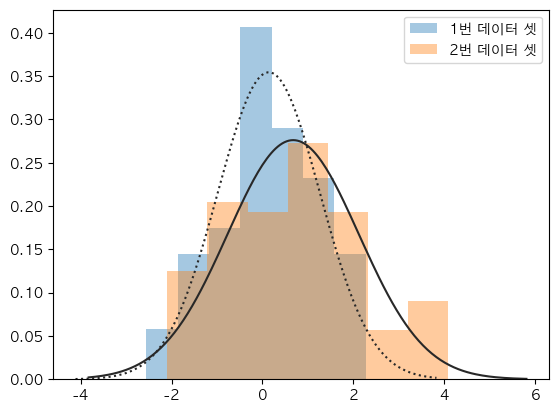

In [41]:
np.random.seed(0)

N1 = 50
N2 = 100

x1 = sp.stats.norm(0,1).rvs(N1)
x2 = sp.stats.norm(0.5, 1.5).rvs(N2)

ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label='1번 데이터 셋')
ax = sns.distplot(x2, kde=False, fit = sp.stats.norm, label='2번 데이터 셋')
ax.lines[0].set_linestyle(':')

plt.legend()
plt.show()

In [42]:
sp.stats.ks_2samp(x1, x2)

KstestResult(statistic=0.23, pvalue=0.05550723364321592)